In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ipywidgets as widgets

plt.style.use('seaborn-whitegrid')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

#Adding target variable to dataframe
data['PRICE'] = boston.target

In [4]:
# See the first few rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per 10,000usd
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population

In [5]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Correlation between the features
corr = data.corr()

<AxesSubplot:>

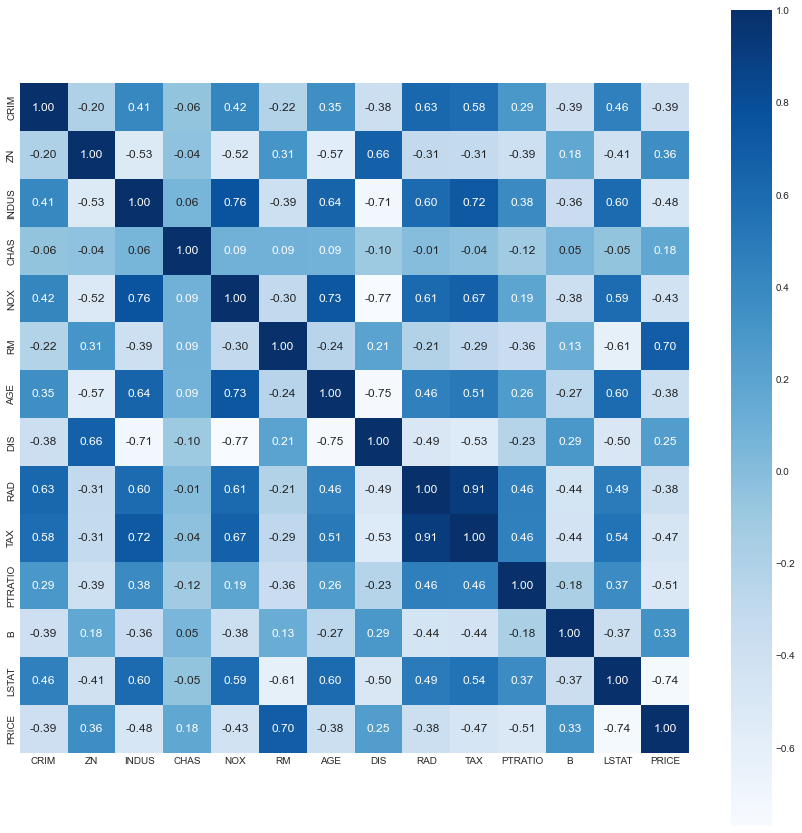

In [7]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(corr, cbar=True, square=True,  fmt='.2f', annot=True, annot_kws={'size':12}, cmap='Blues')

In [8]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [9]:
feature_list = X.columns.tolist()

In [10]:
def create_scatter(feature):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(20,12))

        plt.scatter(x = data[feature],
                    y = data['PRICE'],
                    s=40,
                    c='b'
                   )

        plt.xlabel(feature)
        plt.ylabel('PRICE')

        plt.title("Boston Housing Data Set: %s vs %s"%(feature, 'PRICE'))

interactive(children=(Dropdown(description='feature', options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AG…

<function __main__.create_scatter(feature)>

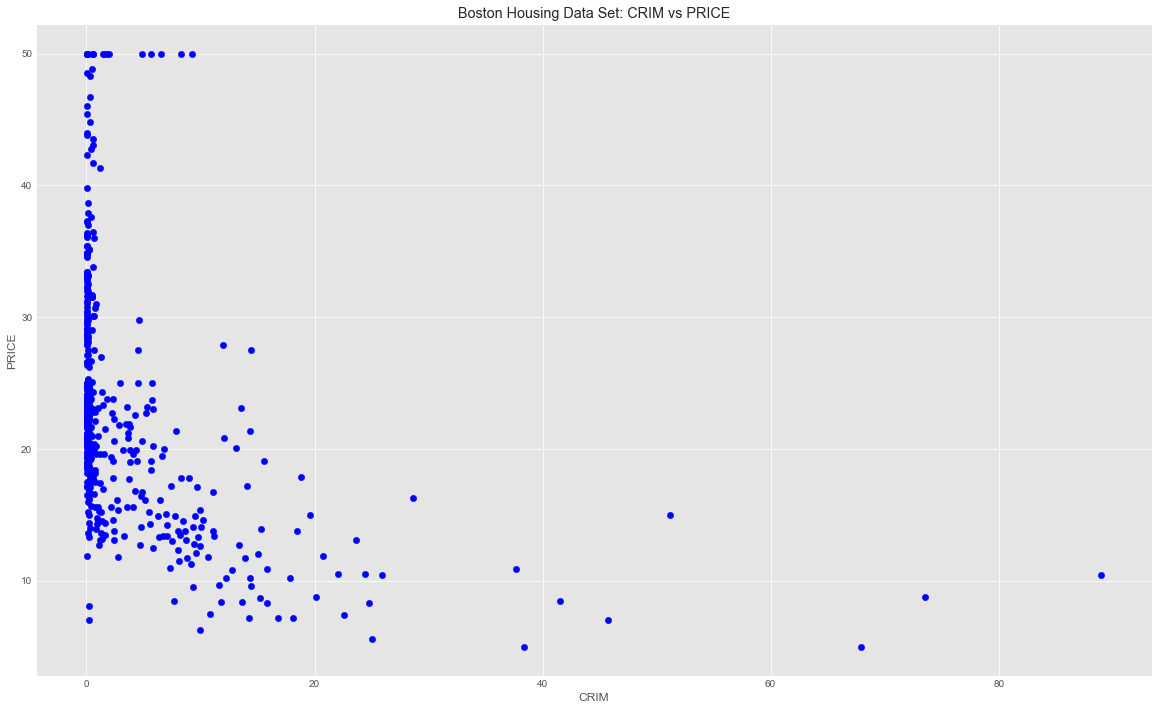

In [11]:
widgets.interact(create_scatter, feature=feature_list)

In [12]:
#Etracting all features which is highly correlated with target 
def highly_correlated(data,threshold):
    feature=[]
    values=[]
    for ele,index in enumerate(data.index):
        if abs(data[index])> threshold:
            feature.append(index)
            values.append(data[index])
    df=pd.DataFrame(data=values,index=feature,columns= ["Correlation"])
    return df

In [13]:
# Select features with highest correlation with target variable PRICE
threshold=0.5
corr_df=highly_correlated(corr['PRICE'],threshold)
corr_df

,Correlation
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
PRICE,1.000000


In [14]:
X = X[['RM', 'PTRATIO', 'LSTAT']]

# Linear Regression

In [15]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [16]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,4.933118
1,PTRATIO,-0.867095
2,LSTAT,-0.567126


In [18]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [19]:
from sklearn import metrics
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6864566575056517
Adjusted R^2: 0.6841050824369441
MAE: 3.68279745582969
MSE: 27.238577411646844
RMSE: 5.219059054240223


In [20]:
from joblib import dump, load

In [21]:
dump(lm, 'lin_model.joblib')

['lin_model.joblib']